In [3]:
import numpy as np

In [4]:
class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        
        # Initialize weights and biases
        sizes = [input_size] + hidden_sizes + [output_size]
        self.weights = [np.random.randn(sizes[i], sizes[i+1]) for i in range(len(sizes)-1)]
        self.biases = [np.random.randn(1, sizes[i+1]) for i in range(len(sizes)-1)]
        
    def forward(self, X):
        a = [X]
        for i in range(len(self.weights)):
            z_i = np.dot(a[-1], self.weights[i]) + self.biases[i]
            a_i = 1 / (1 + np.exp(-z_i))
            a.append(a_i)
        return a[-1]
    
    def backward(self, X, y):
        # Forward propagation
        a = [X]
        for i in range(len(self.weights)):
            z_i = np.dot(a[-1], self.weights[i]) + self.biases[i]
            a_i = 1 / (1 + np.exp(-z_i))
            a.append(a_i)
        
        # Backward propagation
        delta = [2 * (a[-1] - y) * a[-1] * (1 - a[-1])]
        for i in reversed(range(len(self.weights))):
            delta_i = np.dot(delta[-1], self.weights[i].T) * a[i+1] * (1 - a[i+1])
            delta.append(delta_i)
        delta.reverse()
        
        # Update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * np.dot(a[i].T, delta[i+1])
            self.biases[i] -= self.learning_rate * np.sum(delta[i+1], axis=0)
    
    def fit(self, X, y, epochs=100, learning_rate=0.1):
        self.learning_rate = learning_rate
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                # Forward propagation
                y_pred = self.forward(X[i])
                
                # Backward propagation
                self.backward(X[i], y[i])
                
    def predict(self, X):
        return self.forward(X)

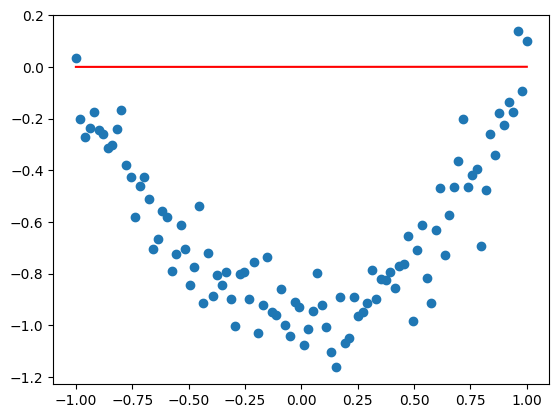

In [5]:
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = np.polyval([1, 0, -1], X) + 0.1 * np.random.randn(100, 1)

# Create and train the MLP
mlp = MLP(1, [10, 10], 1)
mlp.fit(X, y, epochs=1000, learning_rate=0.01)

# Make predictions and plot the results
y_pred = mlp.predict(X)
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()